In [34]:
import pandas as pd
import numpy as np
import math 
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
subscriptions = pd.read_csv('subscriptionsdataFINAL.csv') 
visitation_part1 = pd.read_csv('visitationdataPART1.csv') 
visitation_part2 = pd.read_csv('visitationdataPART2.csv') 

In [41]:
#convert the join and end date to_date
subscriptions['Join Date'] =  pd.to_datetime(subscriptions['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions['End Date'] =  pd.to_datetime(subscriptions['End Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions.dropna()
subscriptions.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982


In [43]:
date_min = min (subscriptions['Join Date'].min(),subscriptions['End Date'].min() )
date_max = max (subscriptions['Join Date'].max(),subscriptions['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')

In [45]:
##we need to know each month kow many activemembers we have to calculate the churn 
##create the dataframe to help us calculate it
customers_total = pd.DataFrame({'Date':dates})
customers_total.head(), customers_total.shape

(        Date
 0 2009-05-01
 1 2009-06-01
 2 2009-07-01
 3 2009-08-01
 4 2009-09-01,
 (116, 1))

In [69]:
##add total month membership in dataframe subscriptions
subscriptions['Duration'] = np.where(subscriptions['End Date'].isna(), 
                                     (date_max - subscriptions['Join Date']), 
                                     (subscriptions['End Date'] - subscriptions['Join Date']) )

In [70]:
##add total month membership in dataframe subscriptions
subscriptions['Duration'] = np.where(subscriptions['End Date'].isna(), 
                                     (date_max - subscriptions['Join Date']), 
                                     (subscriptions['End Date'] - subscriptions['Join Date']) )
##convert the difference in months
subscriptions['Duration'] = (subscriptions['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)
subscriptions.head()

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,Duration
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,0
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972,6
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,7
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,7


In [78]:
##create list with count of members in each month
members_count =  [0] * len(dates)


In [79]:
def add_count(join_date,duration, dates, members_count):
    index = (dates == join_date).argmax()
    for i in range(index,index + duration+1):
        members_count[i] = members_count[i] +1 
    return members_count

In [80]:
subscriptions.apply(lambda row: add_count(row['Join Date'], row['Duration'],
                                          dates, members_count), axis=1)

0         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
1         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
2         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
3         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
4         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
                                ...                        
850028    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850029    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850030    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850031    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850032    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
Length: 850033, dtype: object

In [81]:
# Create a dataframe which lists the total members of each month 
data = {"Date":dates,"Total_members":members_count}
members_count_by_month = pd.DataFrame(data)
members_count_by_month.head()

,Date,Total_members
0,2009-05-01,699
1,2009-06-01,1203
2,2009-07-01,2309
3,2009-08-01,3082
4,2009-09-01,3714


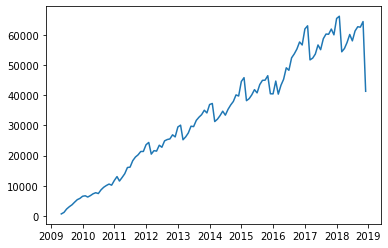

In [84]:
## Plot the total membership vs Date
plt.plot(members_count_by_month.Date,members_count_by_month.Total_members)

In [170]:
# Group visitation_part1 by peak visit or not
visitation_part1_peakvisit = visitation_part1.groupby(['CustomerID', 'peakvisits']).size().unstack(fill_value=0)
visitation_part1_peakvisit.head()

peakvisits,False,True
CustomerID,,
1,11,9
5,18,23
7,64,36
9,26,31
11,75,108


In [171]:
# Group visitation_part2 by peak visit or not
visitation_part2_peakvisit.head()

peakvisits,False,True
CustomerID,,
2,33,41
3,55,110
4,20,32
5,12,40
6,29,10


In [172]:
# Combine Group visitation_part1 and Group visitation_part2
visitation_peakvisit = pd.merge(visitation_part1_peakvisit,visitation_part2_peakvisit,on='CustomerID',how='outer').sort_index().replace({np.nan:0})
visitation_peakvisit.head()

peakvisits,False_x,True_x,False_y,True_y
CustomerID,,,,
1,11.0,9.0,0.0,0.0
2,0.0,0.0,33.0,41.0
3,0.0,0.0,55.0,110.0
4,0.0,0.0,20.0,32.0
5,18.0,23.0,12.0,40.0


In [174]:
# Merge False column and True column, and drop unnecessary column
visitation_peakvisit['False'] = visitation_peakvisit['False_x'] + visitation_peakvisit['False_y']
visitation_peakvisit['True'] = visitation_peakvisit['True_x'] + visitation_peakvisit['True_y']
visitation_peakvisit=visitation_peakvisit.drop(columns=['False_x','True_x','False_y','True_y'])
visitation_peakvisit.head()

peakvisits,False,True
CustomerID,,
1,11.0,9.0
2,33.0,41.0
3,55.0,110.0
4,20.0,32.0
5,30.0,63.0


In [175]:
# Calculate the proportion of peak time and offpeak time
visitation_peakvisit['Peak_proportion'] = visitation_peakvisit['True']/(visitation_peakvisit['True'] + visitation_peakvisit['False'])
visitation_peakvisit.head()

peakvisits,False,True,Peak_proportion
CustomerID,,,
1,11.0,9.0,0.450000
2,33.0,41.0,0.554054
3,55.0,110.0,0.666667
4,20.0,32.0,0.615385
5,30.0,63.0,0.677419


In [177]:
def classify_peak(Peak_proportion):
    if Peak_proportion < 0.35:
        return 'Off_Peak_Customer'
    elif 0.25 <= Peak_proportion < 0.65:
        return 'Average'
    else:
        return 'Peak_Customer'

In [178]:
# Create three categories according to the peak proportion
visitation_peakvisit['Peak_categogy'] = visitation_peakvisit['Peak_proportion'].apply(lambda x : classify_peak(x))
visitation_peakvisit.head()

peakvisits,False,True,Peak_proportion,Peak_categogy
CustomerID,,,,
1,11.0,9.0,0.450000,Average
2,33.0,41.0,0.554054,Average
3,55.0,110.0,0.666667,Peak_Customer
4,20.0,32.0,0.615385,Average
5,30.0,63.0,0.677419,Peak_Customer
